In [45]:
import os
import re
import random
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Configurations

molecule = "poly"
seed = "0"
metrics = ["expected_pairwise_distance", "log_z", "Loss"]

In [39]:
# Open log file and read it

log_path = "../results/" + molecule + "/train/" + seed + "/train.log"

with open(log_path, 'r') as file:
	log_data = file.read()

log_lines = log_data.splitlines()


In [40]:
# Parse log file which have metrics

number_of_metrics = len(metrics)
log = [ [] for _ in range(number_of_metrics)]

for line in log_lines:
	for idx, metric in enumerate(metrics):
		if metric in line:
			val = re.findall(r'[-+]?\d+\.\d+', line)
			log[idx].append(float(val[0]))
			break		

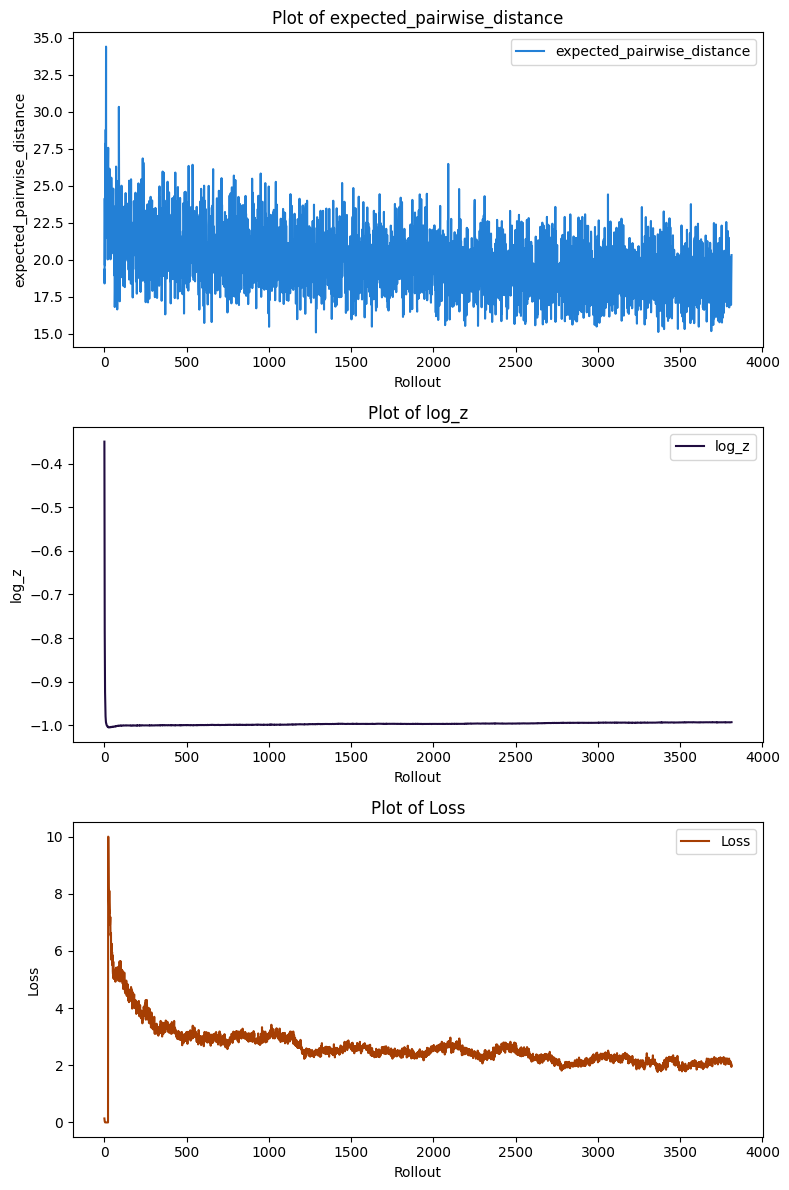

In [44]:
# Plot all the metrics
number_of_metrics = len(metrics)

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

for i in range(number_of_metrics):
	random_color = "#" + ''.join(random.choices('0123456789ABCDEF', k=6))
	axs[i].plot(log[i], label=f'{metrics[i]}', color = random_color)
	axs[i].set_xlabel('Rollout')
	axs[i].set_ylabel(f'{metrics[i]}')
	axs[i].set_title(f'Plot of {metrics[i]}')
	axs[i].legend()

plt.tight_layout()
plt.show()
